In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, math

In [5]:
def edge_detect(file_name, tresh_min, tresh_max):
    f = plt.figure(figsize=(20,20))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    
    image = cv2.imread(file_name)
    im_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, im_bw = cv2.threshold(im_bw, tresh_min, tresh_max, 0)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    col = 0
    cv2.drawContours(image, contours, -1, (255,0,0), 2)
    ax2.imshow(im_bw)
    ax3.imshow(image)
    cv2.imwrite('cnt_'+file_name, image)
    print(len(contours))
    return contours

1


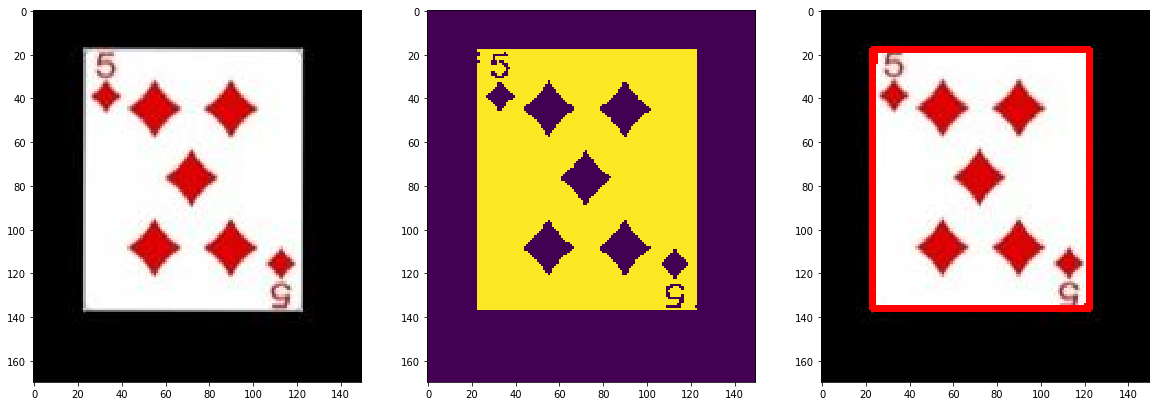

In [7]:
con = edge_detect('../big_au/sample1/D5_0_6140.jpg', 150, 255)

1


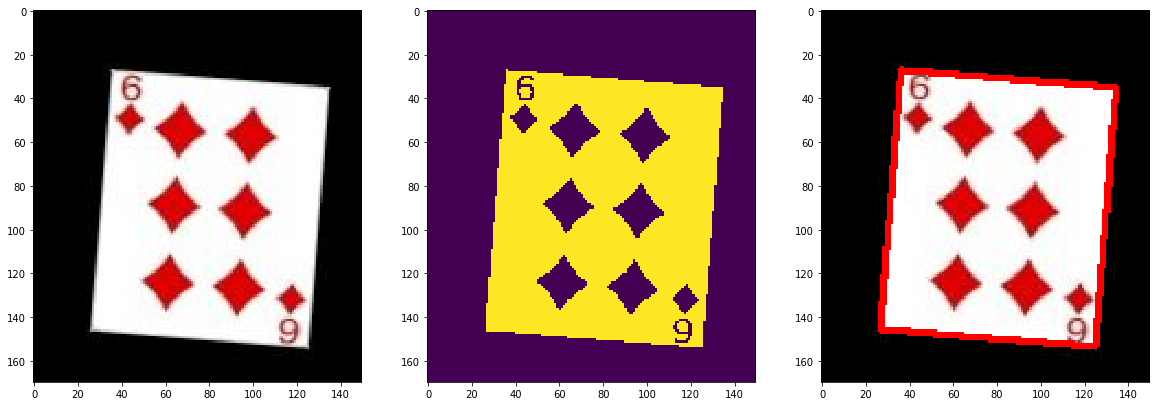

In [8]:
con = edge_detect('../big_au/sample1/D6_0_7081.jpg', 150, 255)

In [ ]:
maxWidth = 200
maxHeight = 300

# Create destination array, calculate perspective transform matrix,
# and warp card image
dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
M = cv2.getPerspectiveTransform(temp_rect,dst)
warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)

In [ ]:
w = 200
h = 300

dst_pts = np.array([[0, 0],
                    [w - 1, 0],
                    [w - 1, h - 1],
                    [0, h - 1]]).astype(np.float32)

pers_mat = cv2.getPerspectiveTransform(src_pts, dst_pts)

dst = cv2.warpPerspective(src, pers_mat, (w, h))

cv2.imshow('dst', dst)

In [16]:
width = 150
height = 170

srcPoint=np.array([[30, 20], [40, 20], [50, 50], [20, 50]], dtype=np.float32)
dstPoint=np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32)

In [11]:
matrix = cv2.getPerspectiveTransform(srcPoint, dstPoint)

In [17]:
src = cv2.imread('spade10.jpg')
dst = cv2.warpPerspective(src, matrix, (width, height))

In [ ]:
'''
M = cv2.getPerspectiveTransform(temp_rect,dst)
warp = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
'''

In [15]:
src.shape

(170, 150, 3)

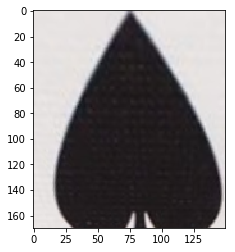

In [18]:
plt.imshow(dst)

In [25]:
con[0].argmax()

67

In [26]:
s = np.sum(con, axis = 2)

In [32]:
s.shape

(1, 69, 2)

In [36]:
s = s.squeeze()

In [43]:
con[0].squeeze().shape

(69, 2)

In [65]:
con2 = con[0].squeeze()

In [49]:
s.shape

(69, 2)

In [52]:
s[s.argmax()]

array([49, 28], dtype=int32)

In [54]:
s.argmin()

1

In [67]:
s = np.sum(con, axis = 2)

tl = con2[np.argmin(s)]
br = con2[np.argmax(s)]

diff = np.diff(con2, axis = -1)

tr = con2[np.argmin(diff)]
bl = con2[np.argmax(diff)]

In [94]:
s_trans = s.transpose()

In [99]:
print(s_trans[0].argmin())
print(s_trans[0].argmax())
print(s_trans[1].argmin())
print(s_trans[1].argmax())

18
52
0
33


In [107]:
print(s[0][s_trans[0].argmin()])
print(s[0][s_trans[0].argmax()])
print(s[0][s_trans[1].argmin()])
print(s[0][s_trans[1].argmax()])

[ 27 134]
[134  41]
[36 27]
[115 153]


In [120]:
temp_rect2 = np.zeros((4,2), dtype = "float32")
temp_rect2[0] = s[0][s_trans[1].argmin()]
temp_rect2[1] = s[0][s_trans[0].argmax()]
temp_rect2[2] = s[0][s_trans[1].argmax()]
temp_rect2[3] = s[0][s_trans[0].argmin()]

In [124]:
temp_rect2

array([[ 36.,  27.],
       [134.,  41.],
       [115., 153.],
       [ 27., 134.]], dtype=float32)

In [126]:
temp_rect2[2][0]+=5

In [ ]:
s_trans[]

In [70]:
temp_rect = np.zeros((4,2), dtype = "float32")
temp_rect[0] = tl
temp_rect[1] = tr
temp_rect[2] = br
temp_rect[3] = bl

In [78]:
img = cv2.imread('../big_au/sample1/D6_0_7081.jpg')

In [127]:
maxWidth = 100
maxHeight = 120

# Create destination array, calculate perspective transform matrix,
# and warp card image
dst = np.array([[0,0],[maxWidth-1,0],[maxWidth-1,maxHeight-1],[0, maxHeight-1]], np.float32)
M = cv2.getPerspectiveTransform(temp_rect2,dst)
warp = cv2.warpPerspective(img, M, (maxWidth, maxHeight))
warp = cv2.cvtColor(warp,cv2.COLOR_BGR2GRAY)

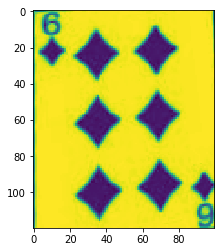

In [128]:
plt.imshow(warp)

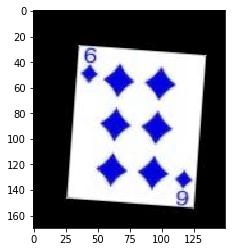

In [116]:
plt.imshow(img)

In [81]:
temp_rect

array([[ 36.,  33.],
       [134.,  35.],
       [ 49.,  28.],
       [ 27., 146.]], dtype=float32)

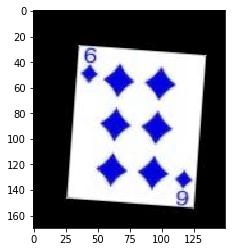

In [82]:
plt.imshow(img)

In [87]:
temp_rect[0] = [30,30]
temp_rect[1] = [130,40]
temp_rect[2] = [125,150]
temp_rect[3] = [25, 150]

array([[ 30.,  30.],
       [134.,  35.],
       [ 49.,  28.],
       [ 27., 146.]], dtype=float32)